# 1. Getting The System Ready

In [7]:
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 2. Loading The Cleaned Data

In [ ]:
df = pd.read_csv("../data/Processed_Student_Performance.csv")
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 3. Training The Models

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)



C:\Users\USER-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:02:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['../artifacts/xgb_model.pkl']

# 4. Evaluate The Models

In [10]:
# Evaluates the model and provides the output in the form of a classification report
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

# 5. Visualize Predictions

In [ ]:
# This method uses the trained model and displays a Confusion Matrix and plots the predictions against the test data

def plot_prediction_results(y_true, y_pred, model_name, use_labels=False):
    # Map numeric labels to letter grades (if needed)
    label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
    
    # Auto-detect labels
    all_labels = sorted(list(set(y_true) | set(y_pred)))
    
    # Try to map to letter grades if possible
    if all(isinstance(label, (int, np.integer)) for label in all_labels):
        y_true_letters = [label_map.get(val, val) for val in y_true]
        y_pred_letters = [label_map.get(val, val) for val in y_pred]
        label_names = [label_map[l] for l in all_labels]
    else:
        y_true_letters = y_true
        y_pred_letters = y_pred
        label_names = all_labels
    
    # -- Confusion Matrix --
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Grade")
    plt.ylabel("Actual Grade")
    plt.tight_layout()
    plt.show()

    # -- Bar Plot --
    df = pd.DataFrame({'Actual': y_true_letters, 'Predicted': y_pred_letters})
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Actual', data=df, order=label_names, palette='muted',legend=True)
    sns.countplot(x='Predicted', data=df, order=label_names, palette='dark', alpha=0.5)
    plt.title(f"{model_name} - Grade Distribution: Actual vs Predicted")
    plt.xlabel("Grade Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 6. Saving The Models

In [ ]:
# Save models
joblib.dump(lr_model, '../artifacts/lr_model.pkl')
joblib.dump(rf_model, '../artifacts/rf_model.pkl')
joblib.dump(xgb_model, '../artifacts/xgb_model.pkl')

# 7. Ouput


=== Logistic Regression Evaluation ===
Accuracy:  0.7244
Precision: 0.6958
Recall:    0.7244
F1 Score:  0.7073

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.05      0.07        22
           1       0.44      0.41      0.43        49
           2       0.56      0.58      0.57        85
           3       0.61      0.57      0.59        86
           4       0.88      0.96      0.92       237

    accuracy                           0.72       479
   macro avg       0.53      0.51      0.51       479
weighted avg       0.70      0.72      0.71       479



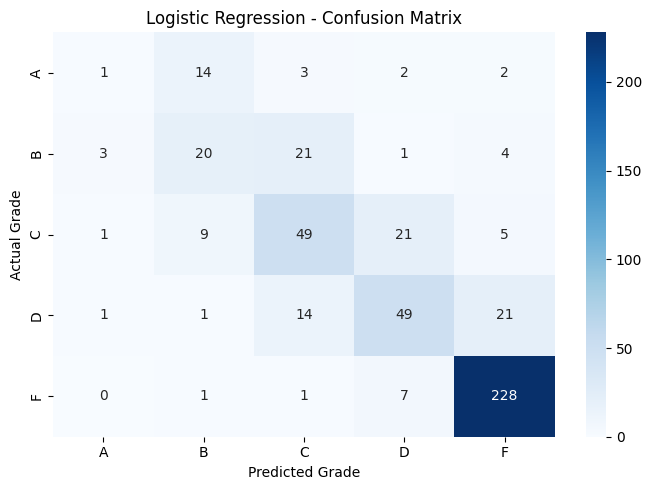

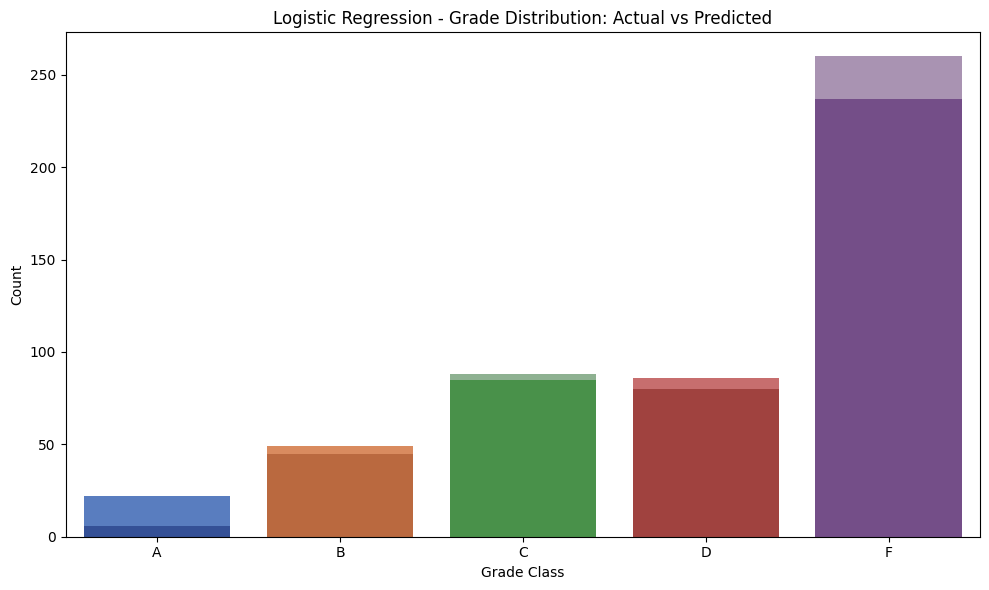


=== Random Forest Evaluation ===
Accuracy:  0.9019
Precision: 0.8997
Recall:    0.9019
F1 Score:  0.8955

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.32      0.45        22
           1       0.76      0.86      0.81        49
           2       0.92      0.85      0.88        85
           3       0.88      0.90      0.89        86
           4       0.94      0.99      0.96       237

    accuracy                           0.90       479
   macro avg       0.86      0.78      0.80       479
weighted avg       0.90      0.90      0.90       479



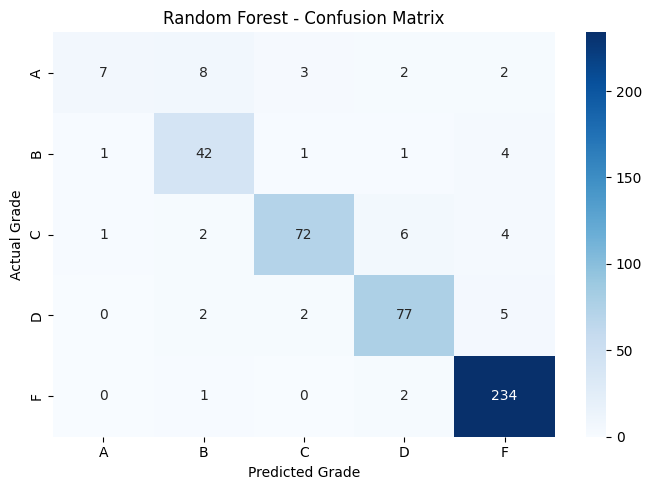

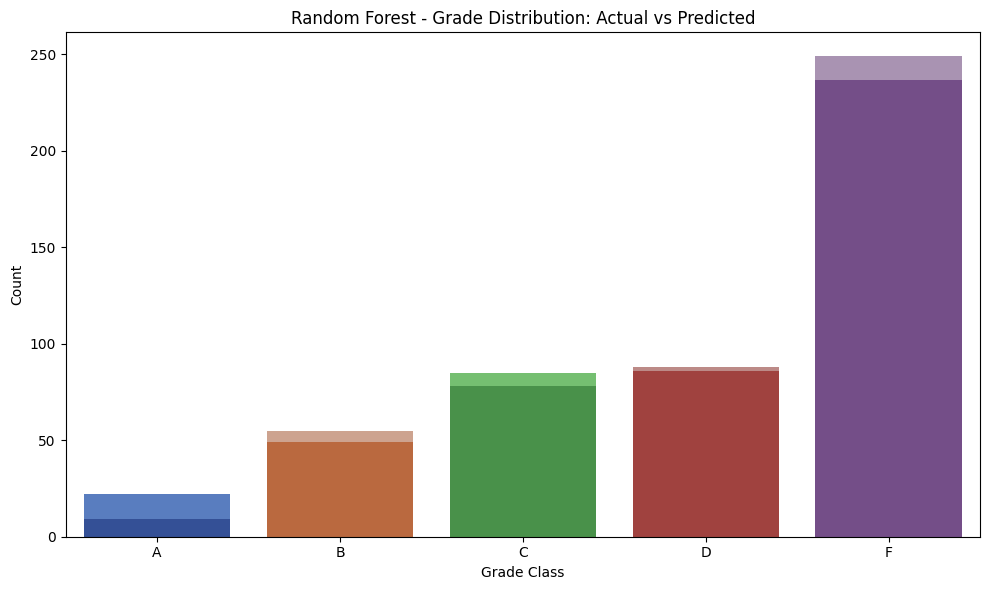


=== XGBoost Evaluation ===
Accuracy:  0.9061
Precision: 0.9045
Recall:    0.9061
F1 Score:  0.9039

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.86      0.86      0.86        49
           2       0.93      0.84      0.88        85
           3       0.86      0.87      0.87        86
           4       0.93      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.87      0.83      0.85       479
weighted avg       0.90      0.91      0.90       479



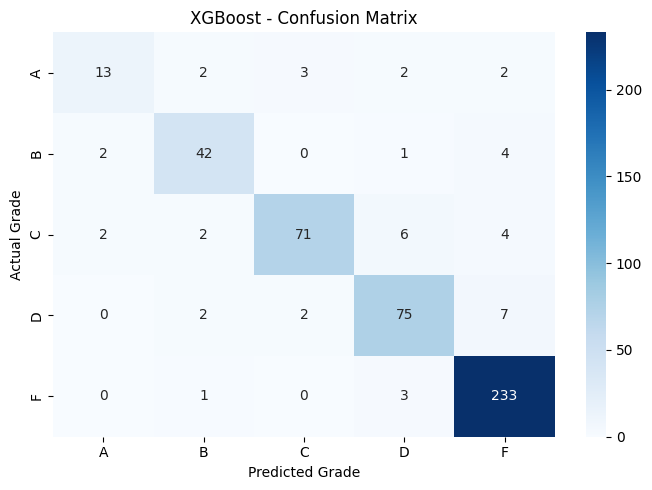

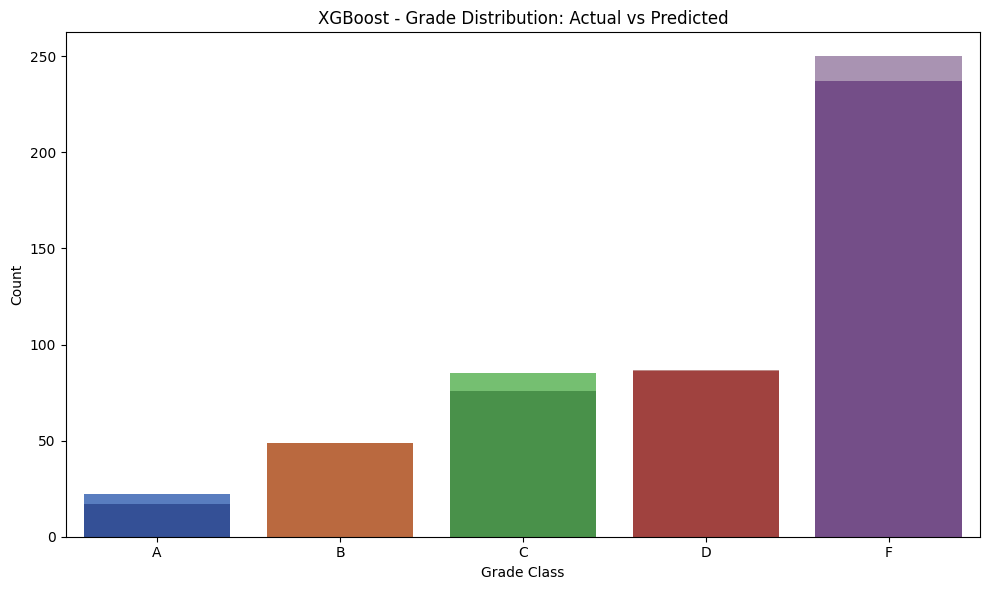

In [14]:
#Logistic Regression
evaluate_model(y_test, lr_pred, "Logistic Regression")
plot_prediction_results(y_test, lr_pred, "Logistic Regression")

# Random Forest
evaluate_model(y_test, rf_pred, "Random Forest")
plot_prediction_results(y_test, rf_pred, "Random Forest")

#XGBoost
evaluate_model(y_test, xgb_pred, "XGBoost")
plot_prediction_results(y_test, xgb_pred, "XGBoost")

